## Información preliminar

| Desafio               | Queries |   |   |   |
|-----------------------|--------|---|---|---|
| **Construir un auto (4)** | **533**    |   |   |   |
| VIH en Chile (1)      | 330    |   |   |   |
| Crimen en Chile (3)   | 189    |   |   |   |
| Acoso Cibernetico (2) | 50     |   |   |   |

Para el desafio 4 (por medio de 04_Sistematizacion), considerando `maxq = 3` se tiene:

- **58674** Total de palabras

- **5998** Total de frases

- **2325** Total de snippets
- **15042** Palabras unicas

<u>Resumen</u>


| Ocurrencias >= | 2     | 3     | 4   | 5     | 6   | 7   | 8  | 9    | 10    | 38 |
|----------------|-------|-------|-----|-------|-----|-----|----|------|-------|----|
| Contribucion   | 43.5% | 27.3% | 20% | 15.5% | 12% | 10% | 9% | 7.9% | 7.12% | 1% |


Se estimo un promedio de 9 palabras por frase.

## min_count

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#https://stackoverflow.com/questions/50683765/how-to-treat-null-as-a-normal-string-with-pandas
#https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte
    
df = pd.read_csv('wxsenstats.csv', names=['word', 'count'], converters={'word' : str}, encoding='latin-1') #fix para null como palabra
#df.isnull().values.any()

In [3]:
df

,word,count
0,auto,473
1,deportivo,18
2,dinero,28
3,cómo,230
4,construir,323
...,...,...
15037,eggs,1
15038,smiley,1
15039,shopkins,1
15040,foam,1


In [4]:
df.describe()

,count
count,15042.000000
mean,3.713270
std,11.359003
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,473.000000


3.7132 ocurrencias promedio para cada palabra

In [5]:
df['word'].count()*100/58674 # porcentaje de palabras unicas en comparacion al total

25.636568156253194

In [6]:
#15042 palabras unicas, 5 valor por defecto del modelo
as1 = df[df['count']==1]['count'].count()
as2 = df[df['count']==2]['count'].count()
as3 = df[df['count']==3]['count'].count()
as4 = df[df['count']==4]['count'].count()
as5 = df[df['count']==5]['count'].count()

In [7]:
strats = pd.Series([as1, as2, as3, as4, as5])
strats

0    8496
1    2430
2    1095
3     679
4     430
dtype: int64

In [8]:
strats[0]*100/df['word'].count() 
# Las palabras que salen una sola vez representan mas de la mitad de las palabras unicas

56.48185081771041

In [9]:
df[df['count']>=2]['count'].count()*100/df['word'].count()

43.51814918228959

In [10]:
df[df['count']>=5]['count'].count()

2342

In [11]:
dplot = df[df['count']>=5]
dplot

,word,count
0,auto,473
1,deportivo,18
2,dinero,28
3,cómo,230
4,construir,323
...,...,...
14511,contrata,5
14539,soapex,5
14682,botiquin,5
14839,symbol,6


In [12]:
dplot.describe()

,count
count,2342.000000
mean,15.584116
std,25.651485
min,5.000000
25%,6.000000
50%,9.000000
75%,15.000000
max,473.000000


In [13]:
#bsize = dplot['count'].max() - dplot['count'].min()
#bsize = int(bsize/3)

In [14]:
def color_label(row):
    if row['count'] <= 25:
        return 'green'
    else:
        if row['count'] <= 50:
            return 'red'
        else:
            return 'blue'

In [15]:
dplot['color_label'] = dplot.apply (lambda row: color_label(row), axis=1)

<ipython-input-15-7ff22350f5b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dplot['color_label'] = dplot.apply (lambda row: color_label(row), axis=1)


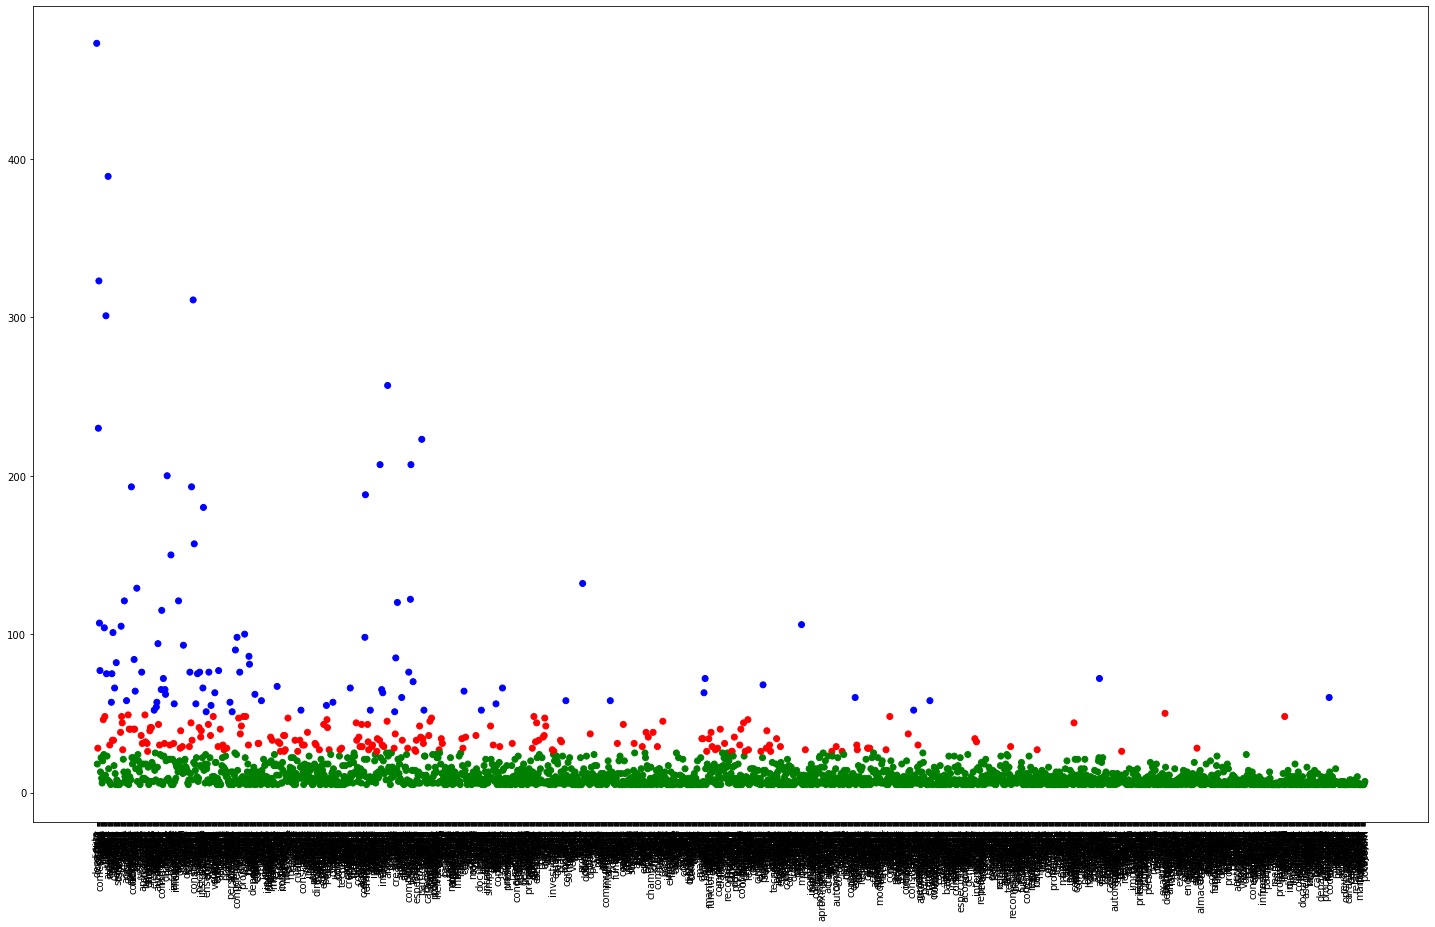

In [16]:
# posible incorporacion de widget segun frecuencia
plt.figure(figsize=(25, 15))
plt.scatter(x=dplot['word'], c=dplot['color_label'], y=dplot['count'])
plt.xticks(rotation=90)
plt.show()

## window

In [17]:
df2 = pd.read_csv('wxsent.csv')
df3 = pd.read_csv('wxpar.csv')

In [18]:
df2[df2['count']<=5]['count'].count()*100/df2['count'].count()

31.393797932644215

In [19]:
df3[df3['count']<=5]['count'].count()*100/df3['count'].count()

0.4731182795698925

In [20]:
display(df2.describe(), df3.describe())

,count
count,5998.000000
mean,9.782261
std,6.973205
min,1.000000
25%,5.000000
50%,8.000000
75%,13.000000
max,49.000000


,count
count,2325.000000
mean,25.236129
std,6.728487
min,1.000000
25%,21.000000
50%,26.000000
75%,30.000000
max,49.000000


<AxesSubplot:>

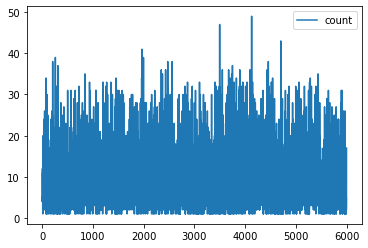

In [21]:
df2.plot()

<AxesSubplot:>

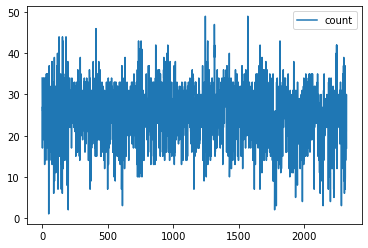

In [22]:
df3.plot() # ajustar histograma pendiente